In [0]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import files 
uploaded = files.upload()

Saving globalterrorismdb.csv to globalterrorismdb.csv


In [0]:
attack = pd.read_csv('globalterrorismdb.csv',encoding='ISO-8859-1', low_memory=False)
attack.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
attack = attack[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
attack['casualities'] = attack['Killed'] + attack['Wounded']

In [0]:
# Selecting top 15 countries
attack_most_freq = attack[(attack.Country == 'Iraq') | (attack.Country == 'Pakistan') | (attack.Country == 'Afghanistan') | (attack.Country == 'India') | (attack.Country == 'Colombia') | (attack.Country == 'Philippines') | (attack.Country == 'Peru') | (attack.Country == 'El Salvador') | (attack.Country == 'United Kingdom') | (attack.Country == 'Turkey') | (attack.Country == 'Somalia') | (attack.Country == 'Nigeria') | (attack.Country == 'Thailand') | (attack.Country == 'Yemen') | (attack.Country == 'Spain')]
attack_most_freq = attack_most_freq.drop(["Summary","Motive"],axis = 1)
#attack_most_freq.mean()
attack_most_freq = attack_most_freq.fillna(attack_most_freq.mean())
#attack_most_freq = attack_most_freq.dropna()
attack_most_freq.isnull().sum()

Year             0
Month            0
Day              0
Country          0
Region           0
city           403
latitude         0
longitude        0
AttackType       0
Killed           0
Wounded          0
Target         287
Group            0
Target_type      0
Weapon_type      0
casualities      0
dtype: int64

In [0]:
attack_most_freq = attack_most_freq.dropna()
attack_most_freq.isnull().sum()
#attack_most_freq.shape

Year           0
Month          0
Day            0
Country        0
Region         0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Group          0
Target_type    0
Weapon_type    0
casualities    0
dtype: int64

In [0]:
attack_most_freq

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,casualities
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.000000,0.000000,Employee,Unknown,Journalists & Media,Unknown,1.000000
26,1970,1,21,Philippines,Southeast Asia,Quezon City,14.674280,121.057495,Bombing/Explosion,0.000000,0.000000,JUSMAG HQ,Unknown,Government (Diplomatic),Explosives,0.000000
39,1970,1,31,Philippines,Southeast Asia,Bamban,15.675051,120.331618,Unknown,0.000000,1.000000,Seaman,New People's Army (NPA),Military,Unknown,1.000000
96,1970,3,0,Philippines,Southeast Asia,Manila,14.596051,120.978666,Bombing/Explosion,0.000000,0.000000,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,0.000000
103,1970,3,3,Spain,Western Europe,Unknown,24.269852,35.529608,Hostage Taking (Kidnapping),0.000000,0.000000,"Garrigues, permanent spanish delegaet to Unesco",1st of May Group,Government (General),Unknown,0.000000
150,1970,3,24,Philippines,Southeast Asia,Angeles,15.153002,120.591942,Unknown,1.000000,0.000000,officer,Unknown,Military,Unknown,1.000000
169,1970,4,2,Philippines,Southeast Asia,Mabalacat City,15.185916,120.541870,Unknown,2.000000,0.000000,Airmen,New People's Army (NPA),Military,Unknown,2.000000
210,1970,4,21,Philippines,Southeast Asia,Cauayan,24.269852,35.529608,Bombing/Explosion,36.000000,0.000000,Philippines Airlines Aircraft,Unknown,Airports & Aircraft,Explosives,36.000000
226,1970,4,25,Turkey,Middle East & North Africa,Istanbul,41.106178,28.689863,Bombing/Explosion,0.000000,0.000000,EL AL Office,Palestinians,Airports & Aircraft,Explosives,0.000000
317,1970,6,2,Philippines,Southeast Asia,Roxas,11.586558,122.753716,Bombing/Explosion,1.000000,12.000000,Philipines Airliner Flight,Unknown,Airports & Aircraft,Explosives,13.000000


In [0]:
attack_most_freq_country = pd.get_dummies(attack_most_freq['Country'])
df_new_1 = pd.concat([attack_most_freq, attack_most_freq_country], axis=1)
# Create a set of dummy variables from the attack_type variable
attack_most_freq_attackType = pd.get_dummies(attack_most_freq['AttackType'])
#df_new_2 = pd.concat([attack_most_freq_country, attack_most_freq_attackType], axis=1)
df_new_2 = df_new_1.join(attack_most_freq_attackType)
attack_most_freq_Region = pd.get_dummies(attack_most_freq['Region'])
df_new_3 = df_new_2.join(attack_most_freq_Region)
df_new_3 = df_new_3.drop(["city","Target","Group"],axis = 1)
df_new_4 = df_new_3.drop(["Target_type","Weapon_type"],axis = 1)
df_new_4.shape

(117659, 42)

In [0]:
df_new_4

,Year,Month,Day,Country,Region,latitude,longitude,AttackType,Killed,Wounded,...,Hostage Taking (Kidnapping),Unarmed Assault,Unknown,Central America & Caribbean,Middle East & North Africa,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
2,1970,1,0,Philippines,Southeast Asia,15.478598,120.599741,Assassination,1.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
26,1970,1,21,Philippines,Southeast Asia,14.674280,121.057495,Bombing/Explosion,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
39,1970,1,31,Philippines,Southeast Asia,15.675051,120.331618,Unknown,0.000000,1.000000,...,0,0,1,0,0,0,0,1,0,0
96,1970,3,0,Philippines,Southeast Asia,14.596051,120.978666,Bombing/Explosion,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
103,1970,3,3,Spain,Western Europe,24.269852,35.529608,Hostage Taking (Kidnapping),0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,1
150,1970,3,24,Philippines,Southeast Asia,15.153002,120.591942,Unknown,1.000000,0.000000,...,0,0,1,0,0,0,0,1,0,0
169,1970,4,2,Philippines,Southeast Asia,15.185916,120.541870,Unknown,2.000000,0.000000,...,0,0,1,0,0,0,0,1,0,0
210,1970,4,21,Philippines,Southeast Asia,24.269852,35.529608,Bombing/Explosion,36.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
226,1970,4,25,Turkey,Middle East & North Africa,41.106178,28.689863,Bombing/Explosion,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
317,1970,6,2,Philippines,Southeast Asia,11.586558,122.753716,Bombing/Explosion,1.000000,12.000000,...,0,0,0,0,0,0,0,1,0,0


In [0]:
y = df_new_4['casualities']
df_new_5 = df_new_4.drop('casualities',axis=1)
#X = df_new_5

In [0]:
df_new_6 = df_new_5.drop(["Country","AttackType","Region"],axis = 1)
X = df_new_6

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = X.astype('float64')
X = sc.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [0]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
mlp = MLPRegressor()
parameters = {'activation' : ['tanh'],
              'solver': ['sgd'],
              'hidden_layer_sizes':np.arange(1, 12)}

mlpregressor = GridSearchCV(mlp, parameters, scoring='neg_mean_squared_error', cv=5)
mlpregressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'activation': ['tanh'], 'solver': ['sgd'], 'hidden_layer_sizes': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
print(mlpregressor.best_params_)
print(mlpregressor.best_score_)

{'activation': 'tanh', 'hidden_layer_sizes': 11, 'solver': 'sgd'}
-85.12876560287725


In [0]:
from sklearn.metrics import mean_squared_error

y_pred = mlpregressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE on MLP model =', mse)
mse_arr = []
mse_arr.append(mse)
mse_arr
mlp_mse = mse

MSE on MLP model = 74.4811628589175


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

lin_reg.fit(X_train, y_train)

mean_MSE = np.mean(MSEs)

mean_MSE

In [0]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE on linear model =', mse)
mse_arr.append(mse)
mse_arr
linear_mse = mse

MSE on linear model = 58.383345587660344


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()

parameters = {'alpha': [1e-3, 1e-2, 1, 5, 10, 20, 40, 80, 160]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_train, y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 80}
-9.448999051504709


In [0]:
y_pred = ridge_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE on ridge model =', mse)
mse_arr.append(mse)
mse_arr
ridge_mse = mse

MSE on ridge model = 58.32356903582978


In [0]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-3, 1e-2, 1, 5, 10, 20, 40, 80, 160]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X_train, y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-9.448818370547153


In [0]:
y_pred = lasso_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE on lasso model =', mse)
mse_arr.append(mse)
mse_arr
lasso_mse = mse

MSE on lasso model = 58.373444205967786


In [0]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

parameters = {'max_depth': range(3,5),
            'n_estimators': (40, 50,),}

rfr = GridSearchCV(rf, parameters, scoring='neg_mean_squared_error', cv=5)

rfr.fit(X_train, y_train)

print(rfr.best_params_)
print(rfr.best_score_)

{'max_depth': 4, 'n_estimators': 40}
-23.532752679739648


In [0]:
y_pred = rfr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE on random_forset model =', mse)
mse_arr.append(mse)
mse_arr
rf_mse = mse

MSE on random_forset model = 32.264421548297086


In [0]:
mse = []
mse.append(mse_arr[0])
mse.append(mse_arr[2])
mse.append(mse_arr[3])
mse.append(mse_arr[4])
col={'Mean Square Error': mse}
models=['MLP', 'Ridge', 'Lasso', 'Random Forset']
df = pd.DataFrame(data=col, index=models)
df

,Mean Square Error
MLP,74.481163
Ridge,58.323569
Lasso,58.373444
Random Forset,58.323569


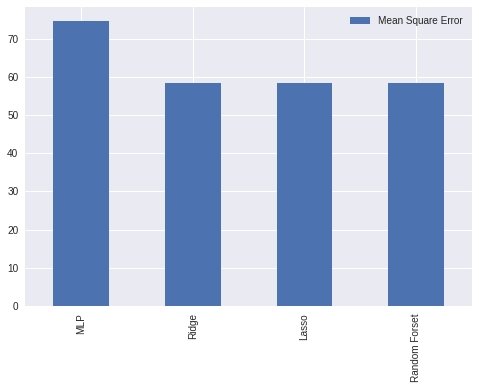

In [0]:
df.plot(kind='bar')